In [57]:
!pip install chart-studio

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotly import tools
import chart_studio.plotly as py  # Sửa lỗi import
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as pltS

from subprocess import check_output
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd

# Đọc file CSV mà không ép kiểu timestamp
file_path = "/content/Bitcoin Historical Data.csv"
data = pd.read_csv(file_path, parse_dates=[0], dayfirst=False)  # Đọc cột ngày tháng

# Kiểm tra dữ liệu
print(data.head())


        Date     Price      Open      High       Low     Vol. Change %
0 2020-08-02  11,105.8  11,802.6  12,061.1  10,730.7  698.62K   -5.91%
1 2020-08-01  11,803.1  11,333.2  11,847.7  11,226.1  611.47K    4.14%
2 2020-07-31  11,333.4  11,096.5  11,434.8  10,964.6  530.95K    2.14%
3 2020-07-30  11,096.2  11,105.8  11,164.4  10,861.6  501.14K   -0.09%
4 2020-07-29  11,105.9  10,908.4  11,336.5  10,771.8  576.83K    1.81%


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 0 to 3668
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3669 non-null   datetime64[ns]
 1   Price     3669 non-null   object        
 2   Open      3669 non-null   object        
 3   High      3669 non-null   object        
 4   Low       3669 non-null   object        
 5   Vol.      3669 non-null   object        
 6   Change %  3669 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 200.8+ KB


In [61]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-02,"11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,2020-08-01,"11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,2020-07-31,"11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,2020-07-30,"11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,2020-07-29,"11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [62]:
print(data.columns)  # Kiểm tra danh sách cột


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [63]:
# Điền NaN cho các cột liên quan
data['Vol.'].fillna(value=0, inplace=True)  # Xử lý cột Volume
data['Price'].fillna(method='ffill', inplace=True)  # Điền dữ liệu liên tục cho giá
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Change %'].fillna(value="0%", inplace=True)  # Điền % thay đổi nếu cần

print(data.head())  # Kiểm tra lại dữ liệu sau khi xử lý


        Date     Price      Open      High       Low     Vol. Change %
0 2020-08-02  11,105.8  11,802.6  12,061.1  10,730.7  698.62K   -5.91%
1 2020-08-01  11,803.1  11,333.2  11,847.7  11,226.1  611.47K    4.14%
2 2020-07-31  11,333.4  11,096.5  11,434.8  10,964.6  530.95K    2.14%
3 2020-07-30  11,096.2  11,105.8  11,164.4  10,861.6  501.14K   -0.09%
4 2020-07-29  11,105.9  10,908.4  11,336.5  10,771.8  576.83K    1.81%


<ipython-input-63-e2573e492369>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-63-e2573e492369>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [64]:
import pandas as pd
import datetime
import pytz

# Chuyển đổi start và end về cùng kiểu datetime64[ns]
start = pd.Timestamp(datetime.datetime(2015, 1, 1)).tz_localize(None)
end = pd.Timestamp(datetime.datetime(2018, 11, 11)).tz_localize(None)

# Đảm bảo cột 'Date' trong data là datetime64[ns]
data['Date'] = pd.to_datetime(data['Date'])

# Lọc dữ liệu theo khoảng thời gian và nhóm theo tuần (thứ Hai)
weekly_rows = (
    data[(data['Date'] >= start) & (data['Date'] <= end)]
    .groupby([pd.Grouper(key='Date', freq='W-MON')])
    .first()
    .reset_index()
)

print(weekly_rows.head())  # Kiểm tra kết quả


        Date  Price   Open   High    Low     Vol. Change %
0 2015-01-05  274.8  264.7  278.3  262.9   54.99K    3.82%
1 2015-01-12  269.3  264.8  273.1  263.3   25.39K    1.72%
2 2015-01-19  215.9  210.6  219.5  205.5   31.58K    2.49%
3 2015-01-26  269.2  252.1  310.9  251.5  105.71K    6.78%
4 2015-02-02  238.9  225.3  242.5  220.5   39.02K    6.02%


In [75]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# Chuyển cột Date về dạng datetime nếu chưa đúng
weekly_rows['Date'] = pd.to_datetime(weekly_rows['Date'], format='%Y-%m-%d')

# Loại bỏ dấu phẩy và ký tự % rồi chuyển đổi sang kiểu float
columns_to_convert = ['Price', 'Low', 'Vol.', 'Change %']
for col in columns_to_convert:
    weekly_rows[col] = weekly_rows[col].astype(str).str.replace(',', '').str.replace('%', '')
    weekly_rows[col] = pd.to_numeric(weekly_rows[col], errors='coerce')

# Kiểm tra lại kiểu dữ liệu
print(weekly_rows.dtypes)

# Vẽ biểu đồ sau khi dữ liệu đã được xử lý
trace1 = go.Scatter(
    x=weekly_rows['Date'],
    y=weekly_rows['Open'],
    mode='lines',
    name='Open'
)

trace2 = go.Scatter(
    x=weekly_rows['Date'],
    y=weekly_rows['High'],
    mode='lines',
    name='High'
)

layout = dict(
    title='Historical Bitcoin Prices (2015-2018) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='1y', step='month', stepmode='backward'),
                dict(count=36, label='3y', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()  # Hoặc dùng iplot(fig) nếu bạn chạy trong Jupyter Notebook


Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object


In [76]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Price'].astype(float),
    mode = 'lines',
    name = 'Bitcoin Price (Open)'
)

layout = dict(
    title='Historical Bitcoin Volume (USD) (2015-2018) with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [107]:
weekly_rows['Vol.'] = weekly_rows['Vol.'].fillna(0)
print(weekly_rows.isnull().sum())  # Kiểm tra xem còn NaN không
print(weekly_rows.head())  # Xem dữ liệu sau khi xử lý

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
        Date  Price   Open   High    Low  Vol.  Change %
0 2015-01-05  274.8  264.7  278.3  262.9   0.0      3.82
1 2015-01-12  269.3  264.8  273.1  263.3   0.0      1.72
2 2015-01-19  215.9  210.6  219.5  205.5   0.0      2.49
3 2015-01-26  269.2  252.1  310.9  251.5   0.0      6.78
4 2015-02-02  238.9  225.3  242.5  220.5   0.0      6.02


In [79]:
# Loại bỏ dấu phẩy trong các số và chuyển về kiểu float
weekly_rows['Open'] = weekly_rows['Open'].str.replace(',', '').astype(float)
weekly_rows['High'] = weekly_rows['High'].str.replace(',', '').astype(float)

# Kiểm tra lại kiểu dữ liệu
print(weekly_rows.dtypes)


AttributeError: Can only use .str accessor with string values!

In [78]:
print(weekly_rows.dtypes)


Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object


In [80]:
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=weekly_rows['Date'],
    y=weekly_rows['Open'],
    mode='lines',
    name='Open'
)

trace2 = go.Scatter(
    x=weekly_rows['Date'],
    y=weekly_rows['High'],
    mode='lines',
    name='High'
)

layout = dict(
    title='Bitcoin Prices (2015-2018)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='1y', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(title='Price')
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


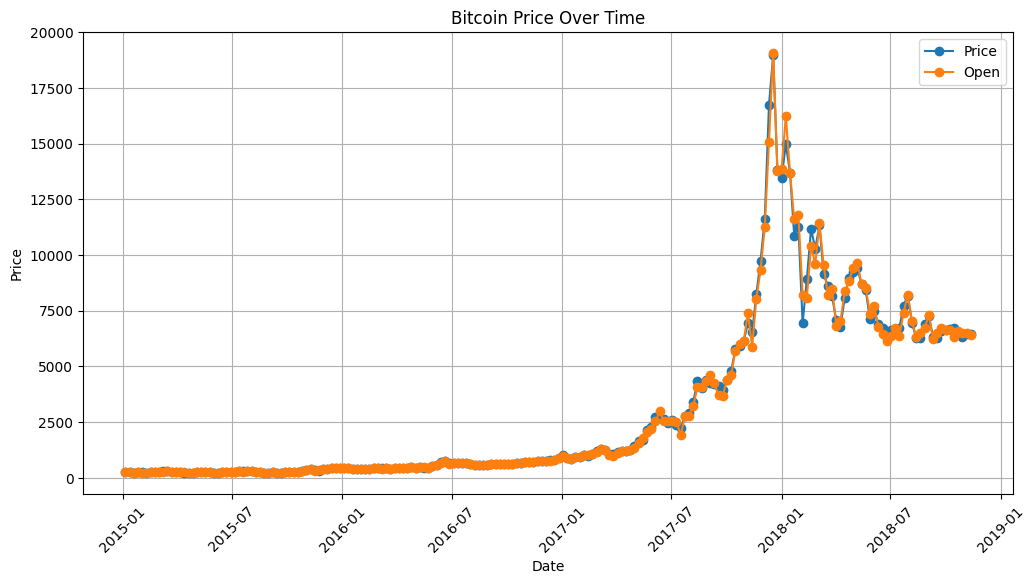

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(weekly_rows['Date'], weekly_rows['Price'], marker='o', linestyle='-', label="Price")
plt.plot(weekly_rows['Date'], weekly_rows['Open'], marker='o', linestyle='-', label="Open")
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.xticks(rotation=45)  # Xoay nhãn ngày để dễ nhìn
plt.grid()
plt.show()


In [90]:
pip install plotly

In [104]:
import plotly.io as pio
pio.renderers.default = "browser"


In [106]:
import plotly.express as px

fig = px.line(weekly_rows, x='Date', y='Price', title="Bitcoin Price Over Time")
pio.renderers.default = "colab"  # Nếu đang chạy trên Google Colab
fig.show()


In [108]:
import plotly.graph_objects as go

# Vẽ biểu đồ scatter (volume vs price)
trace = go.Scatter(
    y=weekly_rows['Vol.'],  # Volume BTC
    x=weekly_rows['Price'],  # Giá Bitcoin
    mode='markers',
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)

# Thiết lập layout
layout = go.Layout(
    title='BTC Volume vs USD',
    xaxis=dict(
        title='Bitcoin Price (USD)',
        titlefont=dict(family='Courier New, monospace', size=18, color='#7f7f7f')
    ),
    yaxis=dict(
        title='Volume BTC',
        titlefont=dict(family='Courier New, monospace', size=18, color='#7f7f7f')
    )
)

# Tạo figure và hiển thị
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [109]:
import pandas as pd
import plotly.graph_objects as go

# Đọc dữ liệu từ file CSV
file_path = "/content/Bitcoin Historical Data.csv"
data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)

# Sắp xếp dữ liệu theo thời gian (nếu chưa sắp xếp)
data = data.sort_values(by='Date')

# Chuyển đổi 'Change %' thành số (bỏ ký tự % và chuyển sang float)
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

# Vẽ biểu đồ giá theo thời gian
trace = go.Scatter(
    x=data['Date'],  # Trục X là thời gian
    y=data['Price'],  # Trục Y là giá đóng cửa
    mode='lines',
    line=dict(color='blue')
)

# Layout cho biểu đồ
layout = go.Layout(
    title='Bitcoin Price Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Closing Price (USD)'),
)

# Hiển thị biểu đồ
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [111]:

# Đặt cột Date làm index để dễ thao tác
data.set_index('Date', inplace=True)

# Ngày chia dữ liệu (định dạng ngày của file là dd-mmm-yyyy)
split_date = '2018-06-25'

# Chia tập dữ liệu thành train/test
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

# Kiểm tra kích thước tập dữ liệu sau khi chia
print(f"Train size: {data_train.shape}")
print(f"Test size: {data_test.shape}")


Train size: (2900, 6)
Test size: (769, 6)


In [114]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Loại bỏ dấu phẩy trong cột 'Price' và chuyển sang float
data_train['Price'] = data_train['Price'].astype(str).str.replace(',', '').astype(float)

# Chuyển đổi thành numpy array
training_set = data_train['Price'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu với MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Tạo X_train và y_train
X_train = training_set_scaled[:-1]
y_train = training_set_scaled[1:]

# Reshape X_train để phù hợp với LSTM
X_train = np.reshape(X_train, (len(X_train), 1, 1))

# Kiểm tra kích thước
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (2899, 1, 1)
y_train shape: (2899, 1)


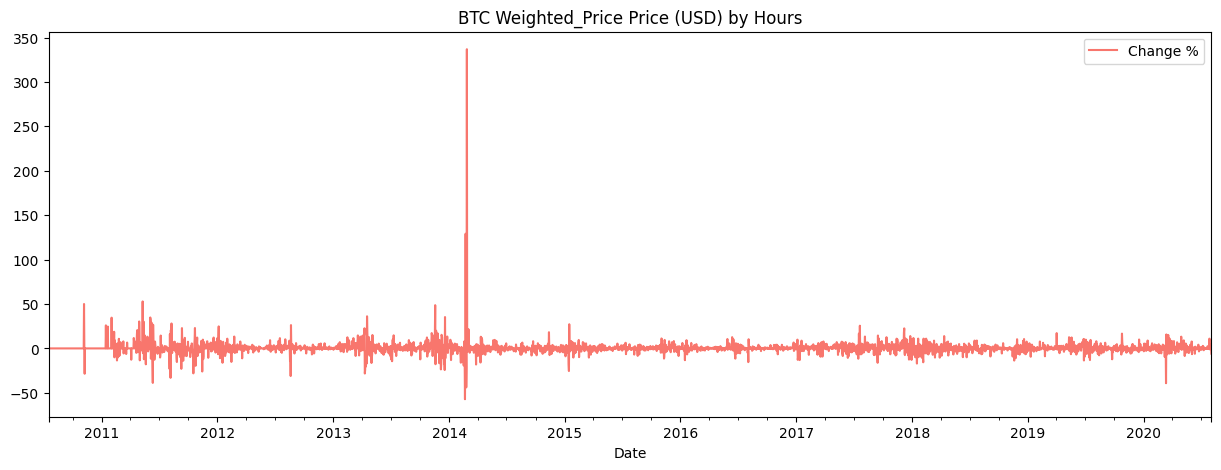

In [115]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

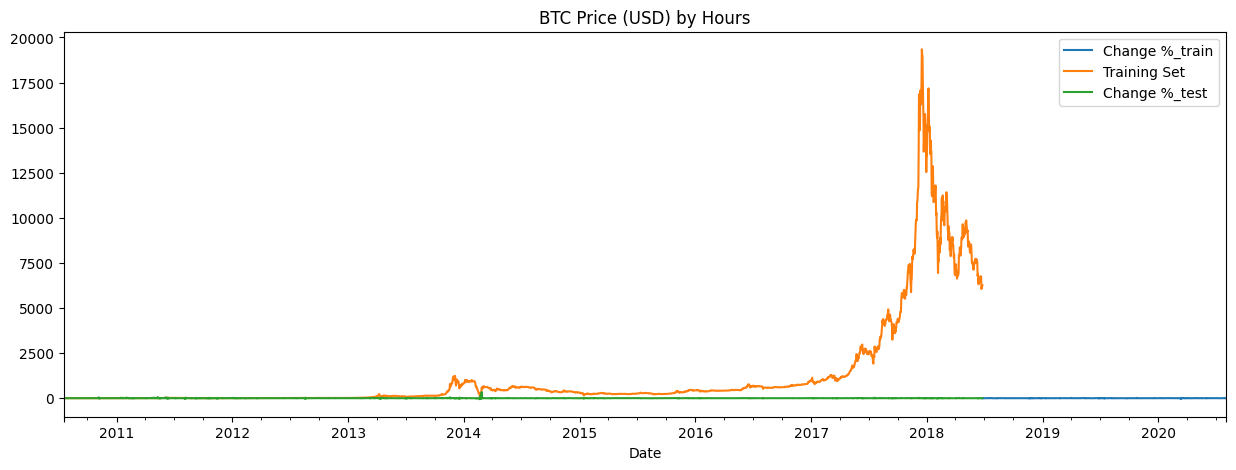

In [119]:
import matplotlib.pyplot as plt

# Đổi tên cột 'Price' thành 'Test Set' cho data_test và 'Training Set' cho data_train
_ = data_test.rename(columns={'Price': 'Test Set'}).join(
    data_train.rename(columns={'Price': 'Training Set'}),
    how='outer',
    lsuffix='_train',  # Thêm hậu tố vào các cột trùng bên train
    rsuffix='_test'    # Thêm hậu tố vào các cột trùng bên test
).plot(figsize=(15, 5), title='BTC Price (USD) by Hours', style='')

# Hiển thị biểu đồ
plt.show()


In [120]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
58/58 - 3s - 51ms/step - loss: 0.0599
Epoch 2/100
58/58 - 0s - 7ms/step - loss: 0.0505
Epoch 3/100
58/58 - 1s - 13ms/step - loss: 0.0410
Epoch 4/100
58/58 - 1s - 20ms/step - loss: 0.0337
Epoch 5/100
58/58 - 1s - 16ms/step - loss: 0.0299
Epoch 6/100
58/58 - 1s - 14ms/step - loss: 0.0255
Epoch 7/100
58/58 - 1s - 12ms/step - loss: 0.0225
Epoch 8/100
58/58 - 1s - 11ms/step - loss: 0.0200
Epoch 9/100
58/58 - 0s - 8ms/step - loss: 0.0185
Epoch 10/100
58/58 - 1s - 11ms/step - loss: 0.0164
Epoch 11/100
58/58 - 1s - 10ms/step - loss: 0.0154
Epoch 12/100
58/58 - 0s - 7ms/step - loss: 0.0138
Epoch 13/100
58/58 - 1s - 11ms/step - loss: 0.0131
Epoch 14/100
58/58 - 0s - 8ms/step - loss: 0.0118
Epoch 15/100
58/58 - 0s - 5ms/step - loss: 0.0110
Epoch 16/100
58/58 - 0s - 5ms/step - loss: 0.0101
Epoch 17/100
58/58 - 0s - 4ms/step - loss: 0.0098
Epoch 18/100
58/58 - 0s - 5ms/step - loss: 0.0089
Epoch 19/100
58/58 - 0s - 5ms/step - loss: 0.0086
Epoch 20/100
58/58 - 0s - 4ms/step - loss: 0.0083

In [121]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 200,069 (781.52 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 133,380 (521.02 KB)

In [127]:
# Loại bỏ dấu ',' và chuyển đổi dữ liệu sang float
data_test['Price'] = data_test['Price'].str.replace(',', '').astype(float)

# Tiếp tục xử lý như cũ
test_set = data_test['Price'].values.reshape(-1, 1)
inputs = sc.transform(test_set)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [128]:
data_test['Price_Prediction'] = predicted_BTC_price
data_all = pd.concat([data_test, data_train], sort=False)

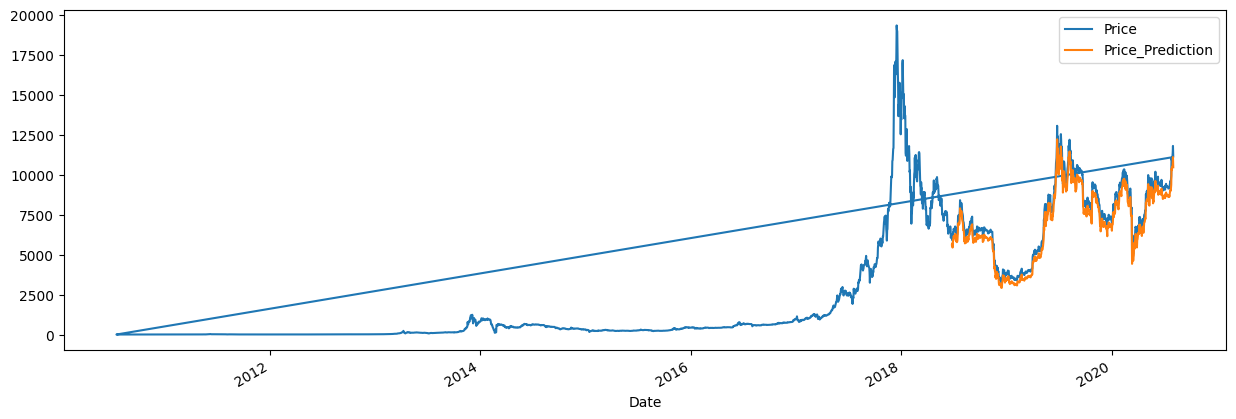

In [129]:
_ = data_all[['Price','Price_Prediction']].plot(figsize=(15, 5))

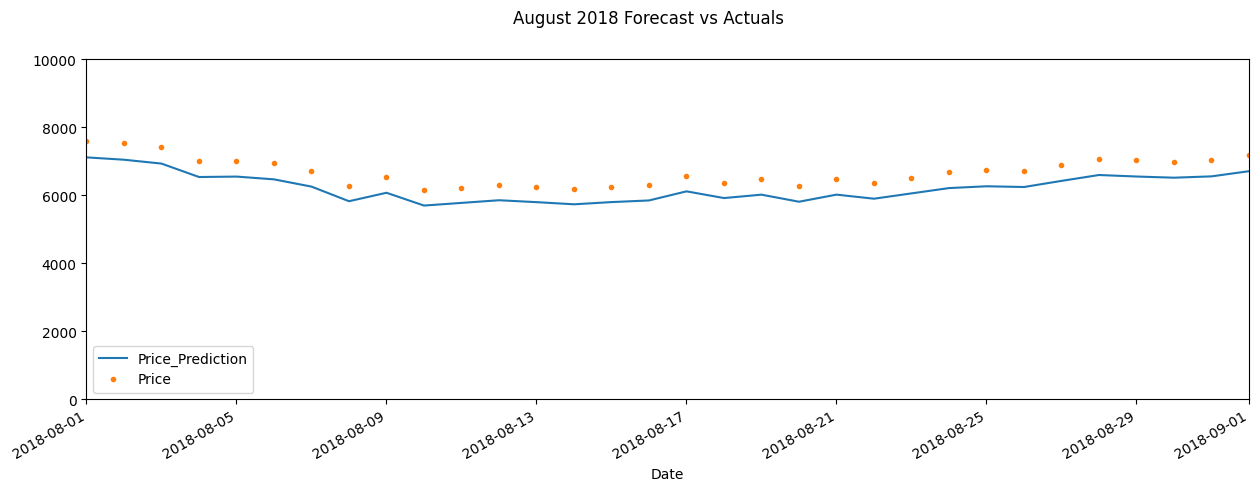

In [130]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Price_Prediction','Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='09-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('August 2018 Forecast vs Actuals')

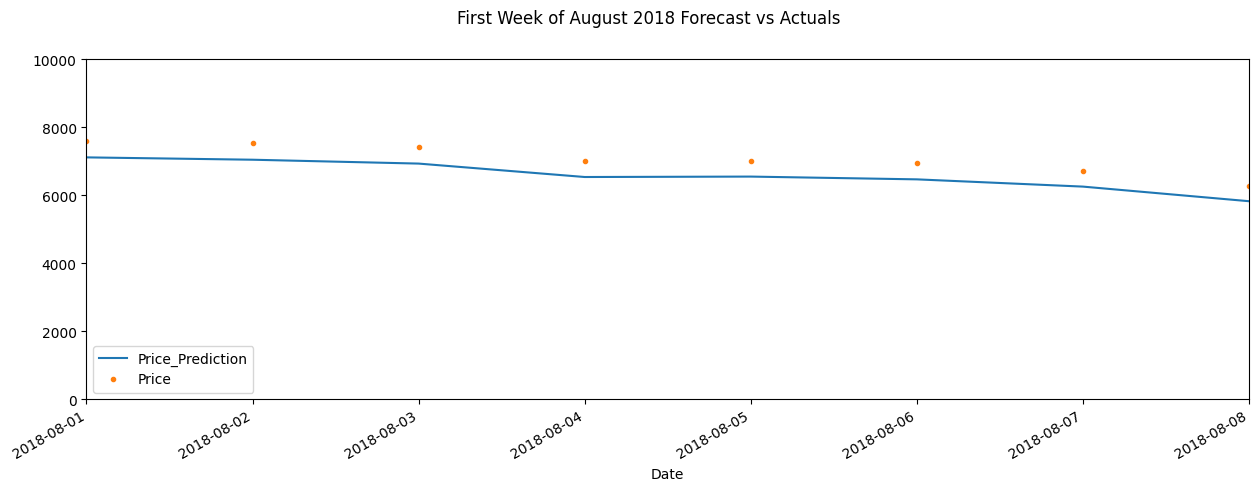

In [131]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Price_Prediction','Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='08-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of August 2018 Forecast vs Actuals')


In [132]:
#calculate MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=data_test['Price'],
                   y_pred=data_test['Price_Prediction'])

239455.77230579453

In [133]:
mean_absolute_error(y_true=data_test['Price'],
                   y_pred=data_test['Price_Prediction'])

482.150122483034

Time Series forecasting with XGBoost

In [135]:
!pip install prophet


In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [140]:
import pandas as pd

# Đọc file CSV với parse_dates
data = pd.read_csv('/content/Bitcoin Historical Data.csv', parse_dates=['Date'], dayfirst=False)

# Chuyển 'Date' về datetime với đúng format
data['Date'] = pd.to_datetime(data['Date'], format='%b %d, %Y')

# Set lại index
data = data.set_index('Date')

# Chọn cột cần thiết
data = data[['Price']]

# Điền giá trị thiếu bằng forward fill
data['Price'].fillna(method='ffill', inplace=True)

# Nhóm theo ngày (nếu cần)
data = data.groupby(pd.Grouper(freq='D')).first().reset_index()

print(data.head())  # Kiểm tra dữ liệu


        Date Price
0 2010-07-18   0.1
1 2010-07-19   0.1
2 2010-07-20   0.1
3 2010-07-21   0.1
4 2010-07-22   0.1


<ipython-input-140-82f0b9cbd4f3>:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-140-82f0b9cbd4f3>:16: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



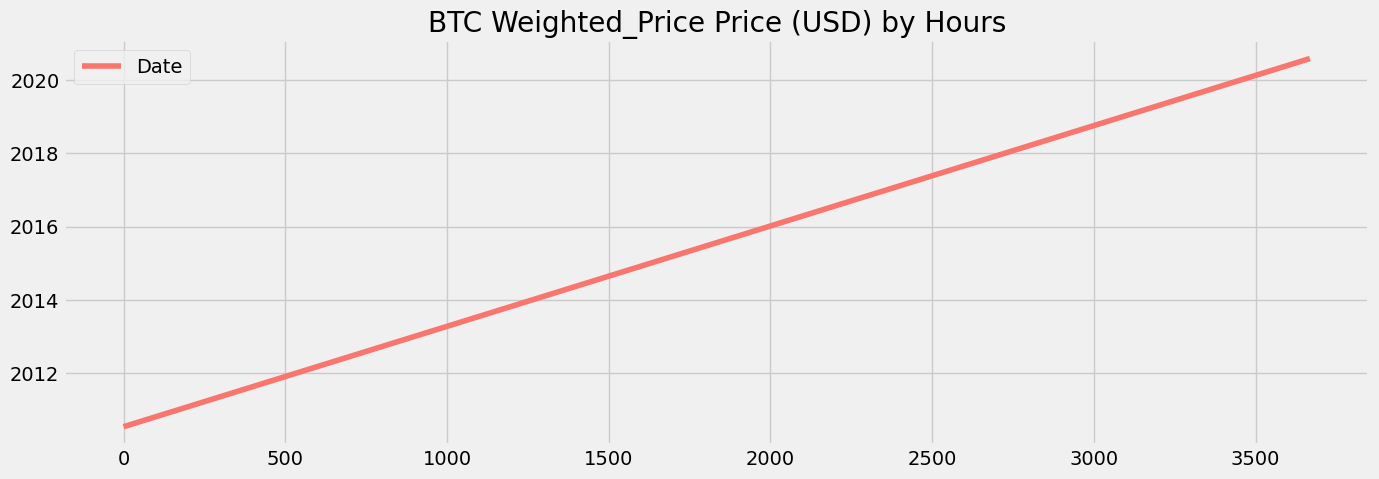

In [141]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

In [7]:
import pandas as pd

# Đọc dữ liệu và chuyển cột 'Date' thành kiểu datetime
data = pd.read_csv('/content/Bitcoin Historical Data.csv', parse_dates=['Date'], dayfirst=True)

# Đặt cột 'Date' làm index
data.set_index('Date', inplace=True)

# Kiểm tra kiểu dữ liệu index
print(data.index)  # Phải là DatetimeIndex


DatetimeIndex(['2020-08-02', '2020-08-01', '2020-07-31', '2020-07-30',
               '2020-07-29', '2020-07-28', '2020-07-27', '2020-07-26',
               '2020-07-25', '2020-07-24',
               ...
               '2010-07-27', '2010-07-26', '2010-07-25', '2010-07-24',
               '2010-07-23', '2010-07-22', '2010-07-21', '2010-07-20',
               '2010-07-19', '2010-07-18'],
              dtype='datetime64[ns]', name='Date', length=3669, freq=None)


In [8]:
# Chuyển đổi split_date thành dạng datetime
split_date = pd.to_datetime('2018-06-25')

# Tách tập dữ liệu dựa trên split_date
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

# Kiểm tra kết quả
print(data_train.head())
print(data_test.head())


              Price     Open     High      Low     Vol. Change %
Date                                                            
2018-06-25  6,256.6  6,155.1  6,331.2  6,101.7  210.69K    1.66%
2018-06-24  6,154.6  6,167.9  6,248.3  5,785.3  240.60K   -0.21%
2018-06-23  6,167.3  6,055.2  6,259.0  6,032.8  142.90K    1.84%
2018-06-22  6,055.7  6,728.2  6,739.7  5,955.0  278.22K   -9.99%
2018-06-21  6,728.0  6,765.8  6,797.5  6,695.1   99.29K   -0.55%
               Price      Open      High       Low     Vol. Change %
Date                                                                
2020-08-02  11,105.8  11,802.6  12,061.1  10,730.7  698.62K   -5.91%
2020-08-01  11,803.1  11,333.2  11,847.7  11,226.1  611.47K    4.14%
2020-07-31  11,333.4  11,096.5  11,434.8  10,964.6  530.95K    2.14%
2020-07-30  11,096.2  11,105.8  11,164.4  10,861.6  501.14K   -0.09%
2020-07-29  11,105.9  10,908.4  11,336.5  10,771.8  576.83K    1.81%


In [9]:
data_test['Price'] = data_test['Price'].str.replace(',', '').astype(float)
data_train['Price'] = data_train['Price'].str.replace(',', '').astype(float)


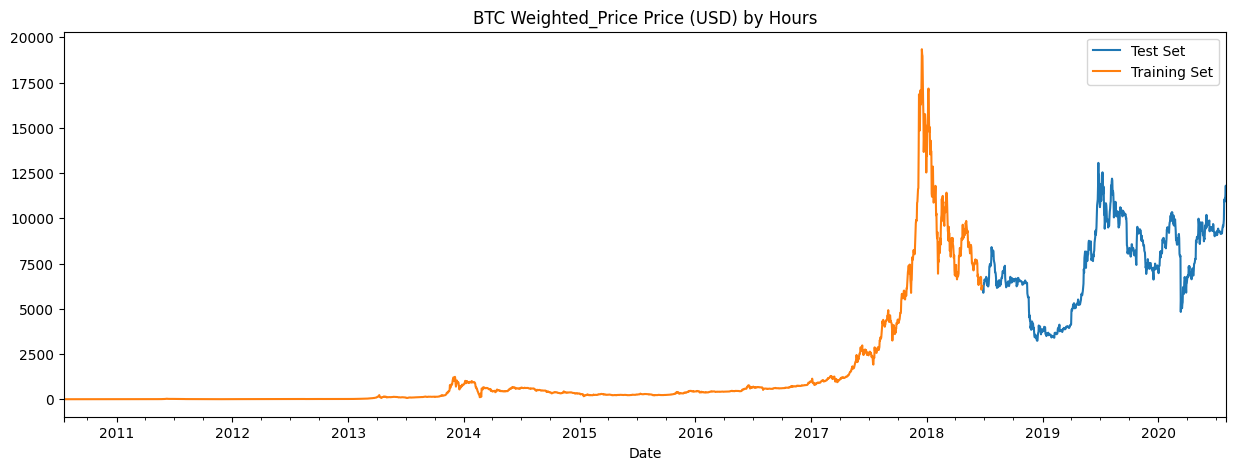

In [10]:
_ = data_test[['Price']].rename(columns={'Price': 'Test Set'}) \
    .join(data_train[['Price']].rename(columns={'Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')


In [11]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    # Kiểm tra nếu index chưa là datetime thì chuyển đổi
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week  # Sửa lỗi ở đây ✅

    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year',
            'dayofyear', 'dayofmonth', 'weekofyear']]

    if label:
        y = df[label]
        return X, y
    return X


In [12]:
X_train, y_train = create_features(data_train, label='Price')
X_test, y_test = create_features(data_test, label='Price')


In [13]:
pip install xgboost==2.0.0


  Using cached xgboost-2.0.0-py3-none-manylinux2014_x86_64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.0-py3-none-manylinux2014_x86_64.whl (297.1 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [17]:
import xgboost as xgb

# Khởi tạo mô hình
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    min_child_weight=10,
    booster='gbtree',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=100
)

# Huấn luyện mô hình
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],  # ✅ Dùng eval_set thay vì evals
    early_stopping_rounds=50,  # ✅ Nếu muốn dùng early stopping
    verbose=True
)


[0]	validation_0-rmse:2822.45226	validation_1-rmse:6540.86549
[1]	validation_0-rmse:2814.19255	validation_1-rmse:6552.92091
[2]	validation_0-rmse:2618.63010	validation_1-rmse:5821.11963
[3]	validation_0-rmse:2612.04268	validation_1-rmse:5832.52003
[4]	validation_0-rmse:2606.10746	validation_1-rmse:5843.50546
[5]	validation_0-rmse:2601.71225	validation_1-rmse:5853.16776
[6]	validation_0-rmse:2598.13336	validation_1-rmse:5862.02099
[7]	validation_0-rmse:2593.44416	validation_1-rmse:5869.98443
[8]	validation_0-rmse:2347.78601	validation_1-rmse:5354.33922
[9]	validation_0-rmse:2195.65180	validation_1-rmse:4803.39807
[10]	validation_0-rmse:2193.57944	validation_1-rmse:4810.57919
[11]	validation_0-rmse:2192.78748	validation_1-rmse:4811.18242
[12]	validation_0-rmse:2061.45643	validation_1-rmse:4335.56645
[13]	validation_0-rmse:1868.02405	validation_1-rmse:4054.25263
[14]	validation_0-rmse:1866.41228	validation_1-rmse:4061.31073
[15]	validation_0-rmse:1865.08122	validation_1-rmse:4067.72132
[1

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1692.78858	validation_1-rmse:3860.41328
[18]	validation_0-rmse:1690.74062	validation_1-rmse:3865.89700
[19]	validation_0-rmse:1690.73079	validation_1-rmse:3865.72568
[20]	validation_0-rmse:1690.05020	validation_1-rmse:3870.94254
[21]	validation_0-rmse:1598.66447	validation_1-rmse:3597.76379
[22]	validation_0-rmse:1597.39999	validation_1-rmse:3601.87070
[23]	validation_0-rmse:1596.73978	validation_1-rmse:3606.17469
[24]	validation_0-rmse:1452.59616	validation_1-rmse:3478.57589
[25]	validation_0-rmse:1452.01510	validation_1-rmse:3481.92249
[26]	validation_0-rmse:1451.84582	validation_1-rmse:3483.52976
[27]	validation_0-rmse:1381.44055	validation_1-rmse:3313.76122
[28]	validation_0-rmse:1381.42618	validation_1-rmse:3313.66871
[29]	validation_0-rmse:1381.01901	validation_1-rmse:3314.02870
[30]	validation_0-rmse:1380.75291	validation_1-rmse:3315.12401
[31]	validation_0-rmse:1380.20726	validation_1-rmse:3318.24074
[32]	validation_0-rmse:1379.82526	validation_1-rmse:332

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(alpha=10, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [19]:
import xgboost as xgb

# Khởi tạo mô hình
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Thay 'reg:linear' bằng 'reg:squarederror'
    min_child_weight=10,
    booster='gbtree',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=100,
    eval_metric="rmse"  # Định nghĩa eval_metric ở đây
)

# Huấn luyện mô hình (Sửa lại cú pháp)
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Chỉ dùng tập test
    verbose=True,

)


[0]	validation_0-rmse:6540.86549
[1]	validation_0-rmse:6552.92091
[2]	validation_0-rmse:5821.11963
[3]	validation_0-rmse:5832.52003
[4]	validation_0-rmse:5843.50546
[5]	validation_0-rmse:5853.16776
[6]	validation_0-rmse:5862.02099
[7]	validation_0-rmse:5869.98443
[8]	validation_0-rmse:5354.33922
[9]	validation_0-rmse:4803.39807
[10]	validation_0-rmse:4810.57919
[11]	validation_0-rmse:4811.18242
[12]	validation_0-rmse:4335.56645
[13]	validation_0-rmse:4054.25263
[14]	validation_0-rmse:4061.31073
[15]	validation_0-rmse:4067.72132
[16]	validation_0-rmse:4067.53389
[17]	validation_0-rmse:3860.41328
[18]	validation_0-rmse:3865.89700
[19]	validation_0-rmse:3865.72568
[20]	validation_0-rmse:3870.94254
[21]	validation_0-rmse:3597.76379
[22]	validation_0-rmse:3601.87070
[23]	validation_0-rmse:3606.17469
[24]	validation_0-rmse:3478.57589
[25]	validation_0-rmse:3481.92249
[26]	validation_0-rmse:3483.52976
[27]	validation_0-rmse:3313.76122
[28]	validation_0-rmse:3313.66871
[29]	validation_0-rmse:3

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(alpha=10, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [20]:
data_test['Price_Prediction'] = model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

In [22]:
import pandas as pd

# ✅ Kiểm tra nếu final_data chưa tồn tại, tạo DataFrame rỗng
if 'final_data' not in globals():
    final_data = pd.DataFrame()

# ✅ Gộp dữ liệu test & train
data_all = pd.concat([data_test, data_train], sort=False)

# ✅ Nếu final_data rỗng, gán dữ liệu từ data_all
if final_data.empty:
    final_data = data_all.copy()
else:
    final_data = pd.merge(final_data, data_all, sort=False)

# ✅ Đổi tên cột để khớp với dữ liệu thực tế
final_data = final_data.rename(columns={'date': 'Date', 'xgboost': 'Price_Prediction'})

# ✅ Chỉ lấy các cột có tồn tại để tránh lỗi KeyError
required_columns = ['Date', 'Price_Prediction', 'lstm']
existing_columns = [col for col in required_columns if col in final_data.columns]

final_data = final_data[existing_columns]

# ✅ Kiểm tra kết quả
print(final_data.head())


                 Date  Price_Prediction
Date                                   
2020-08-02 2020-08-02       7278.957520
2020-08-01 2020-08-01       7246.518555
2020-07-31 2020-07-31       6828.170898
2020-07-30 2020-07-30       6855.837891
2020-07-29 2020-07-29       6862.678223


In [23]:
# ✅ Kiểm tra cột có trong final_data trước khi merge
print("Cột có trong final_data:", final_data.columns)
print("Cột có trong data_all:", data_all.columns)

# ✅ Kiểm tra nếu cột Price_Prediction có trong data_all trước khi merge
if 'Price_Prediction' not in data_all.columns:
    print("⚠ Cột 'Price_Prediction' không tồn tại trong data_all! Kiểm tra lại mô hình dự đoán.")

# ✅ Kiểm tra nếu cột lstm có trong data_all trước khi merge
if 'lstm' not in data_all.columns:
    print("⚠ Cột 'lstm' không tồn tại trong data_all! Đảm bảo đã thêm dữ liệu lstm vào.")

# ✅ Đổi tên cột trước khi merge (nếu cần)
data_all = data_all.rename(columns={'xgboost': 'Price_Prediction'})

# ✅ Chỉ merge các cột có trong cả hai dataframe
final_data = pd.merge(final_data, data_all, how="outer", sort=False)

# ✅ Chọn chỉ các cột có sẵn để tránh lỗi KeyError
required_columns = ['Date', 'Price_Prediction', 'lstm', 'xgboost']
existing_columns = [col for col in required_columns if col in final_data.columns]

final_data = final_data[existing_columns]

# ✅ Kiểm tra dữ liệu sau khi sửa
print(final_data.head())


Cột có trong final_data: Index(['Date', 'Price_Prediction'], dtype='object')
Cột có trong data_all: Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'date', 'hour',
       'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth',
       'weekofyear', 'Price_Prediction'],
      dtype='object')
⚠ Cột 'lstm' không tồn tại trong data_all! Đảm bảo đã thêm dữ liệu lstm vào.
        Date  Price_Prediction
0 2020-06-30       6818.069824
1 2020-06-29       6823.979492
2 2020-07-31       6828.170898
3 2018-06-30       6841.978516
4 2018-06-29       6845.723633


In [2]:
import pandas as pd  # ✅ Import pandas để tránh lỗi NameError

# ✅ Kiểm tra nếu final_data chưa tồn tại, tạo DataFrame rỗng
if 'final_data' not in globals():
    final_data = pd.DataFrame()

# ✅ Nếu final_data rỗng, gán dữ liệu từ data_all
if final_data.empty:
    final_data = data_all.copy()
else:
    final_data = pd.merge(final_data, data_all, sort=False)

# ✅ Đổi tên cột để tránh KeyError
final_data = final_data.rename(columns={'date': 'Date', 'price': 'Price_Prediction'})

# ✅ Chỉ chọn các cột có sẵn để tránh lỗi KeyError
required_columns = ['Date', 'Price_Prediction', 'lstm', 'xgboost']
existing_columns = [col for col in required_columns if col in final_data.columns]

final_data = final_data[existing_columns]

# ✅ Kiểm tra dữ liệu
print(final_data.head())


NameError: name 'data_all' is not defined